# Libraries

In [1]:
import numpy as np
from sklearn.cluster import KMeans
# from functions import load_data_CMU, load_data, connect_neighbors, search_and_evaluate, analysis, generate_graph_html, mean_squared_error, mean_pixelwise_joint_squared_error, percentage_correct_keypoints, sliding_window
import time
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
import time
import numpy as np
from sklearn.neighbors import KDTree
from sklearn.metrics import mean_squared_error
import time
import numpy as np
import os
import sys
import numpy as np
import librosa
from numba import jit
from matplotlib import patches
import libfmp.b
import libfmp.c3
import libfmp.c7
import networkx as nx
from dtw import *
from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt

import h5py

query = None
dataset = None
matrix = None
indices = None
motion = None
data_eval = None

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
def load_data(query_path,dataset_path):
    mat_file = h5py.File(query_path, 'r')
    mat_file2 = h5py.File(dataset_path, 'r')
    Q = mat_file['queryDataset']['pos']
    D = mat_file2['wholeDataset']['pos']
    Qnp = np.array(Q)
    Dnp = np.array(D)
    query = Qnp
    dataset = Dnp
    return query, dataset


def load_data_CMU(query_path,dataset_path):
    query = np.load(query_path)
    dataset = np.load(dataset_path)

    return query, dataset

In [9]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
import time
import csv

# Load your query and dataset
query, dataset = load_data('queryDataset.mat', 'wholeDataset.mat')
# query, dataset = load_data_CMU('query.npy','Dataset.npy')


# Define a list of values of K to iterate over
k_values = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
# k_values = [8]
# Define a list of algorithms to iterate over
algorithms = ['ball_tree', 'kd_tree', 'brute']
# algorithms = ['kd_tree']

# Define distance metrics including 'cityblock'
distance_metrics = ['euclidean', 'minkowski', 'cityblock', 'chebyshev']
# distance_metrics = ['cityblock']

# Initialize a list to store results
results = []

for algorithm in algorithms:
    for k in k_values:
        for metric in distance_metrics:
            # Creating a NearestNeighbors object with the current algorithm and distance metric
            nn = NearestNeighbors(n_neighbors=k, algorithm=algorithm, metric=metric)
            
            # Start timing the NN computation
            start_time = time.time()
            
            # Fit the model on your dataset
            nn.fit(dataset)
            
            # Finding the nearest neighbors to your query
            
            distances, indices = nn.kneighbors(query)
            
            # End timing the NN computation
            end_time = time.time()
            
            nn_time = end_time - start_time
            
            # Initialize lists to store evaluation metrics
            mse_list = []
                        
            for i in range(len(query)):          
                # Calculate Mean Squared Error (MSE)
#                 mse = mean_squared_error(np.tile(query[i], (k, 1)), dataset[indices[i]])
                mse = np.mean((query[i] - dataset[indices[i]])** 2)
                mse_list.append(mse)
                            
            # Calculate the mean of each evaluation metric
            mean_mse = np.mean(mse_list)
            
            # Append results to the list
            results.append([algorithm, k, metric, nn_time, mean_mse])
            
            # Print the results
            print(f"Algorithm: {algorithm}, K = {k}, Metric: {metric}")
            print(f"Mean Squared Error (MSE): {mean_mse}")
            
# Save results to CSV
csv_filename = 'nn_results_with_mse_hdm05_myMSE.csv'
header = ['Algorithm', 'K', 'Distance Metric', 'Time Taken', 'Mean Squared Error (MSE)']

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(results)

print(f"Results saved to {csv_filename}")
print("Successfully Executed:")

Algorithm: ball_tree, K = 8, Metric: euclidean
Mean Squared Error (MSE): 4.33677339553833
Algorithm: ball_tree, K = 8, Metric: minkowski
Mean Squared Error (MSE): 4.33677339553833
Algorithm: ball_tree, K = 8, Metric: cityblock
Mean Squared Error (MSE): 4.7179341316223145
Algorithm: ball_tree, K = 8, Metric: chebyshev
Mean Squared Error (MSE): 5.383810043334961
Algorithm: ball_tree, K = 16, Metric: euclidean
Mean Squared Error (MSE): 4.993270397186279
Algorithm: ball_tree, K = 16, Metric: minkowski
Mean Squared Error (MSE): 4.993270397186279
Algorithm: ball_tree, K = 16, Metric: cityblock
Mean Squared Error (MSE): 5.424281120300293
Algorithm: ball_tree, K = 16, Metric: chebyshev
Mean Squared Error (MSE): 6.208016872406006
Algorithm: ball_tree, K = 32, Metric: euclidean
Mean Squared Error (MSE): 5.890205383300781
Algorithm: ball_tree, K = 32, Metric: minkowski
Mean Squared Error (MSE): 5.890205383300781
Algorithm: ball_tree, K = 32, Metric: cityblock
Mean Squared Error (MSE): 6.410573482

Algorithm: brute, K = 32, Metric: cityblock
Mean Squared Error (MSE): 6.410573482513428
Algorithm: brute, K = 32, Metric: chebyshev
Mean Squared Error (MSE): 7.326613426208496
Algorithm: brute, K = 64, Metric: euclidean
Mean Squared Error (MSE): 7.045913219451904
Algorithm: brute, K = 64, Metric: minkowski
Mean Squared Error (MSE): 7.045913219451904
Algorithm: brute, K = 64, Metric: cityblock
Mean Squared Error (MSE): 7.6849164962768555
Algorithm: brute, K = 64, Metric: chebyshev
Mean Squared Error (MSE): 8.765524864196777
Algorithm: brute, K = 128, Metric: euclidean
Mean Squared Error (MSE): 8.455245018005371
Algorithm: brute, K = 128, Metric: minkowski
Mean Squared Error (MSE): 8.455245018005371
Algorithm: brute, K = 128, Metric: cityblock
Mean Squared Error (MSE): 9.24409008026123
Algorithm: brute, K = 128, Metric: chebyshev
Mean Squared Error (MSE): 10.49583625793457
Algorithm: brute, K = 256, Metric: euclidean
Mean Squared Error (MSE): 10.119658470153809
Algorithm: brute, K = 256,

# Visualization 1: Comparing Time Taken by Algorithms

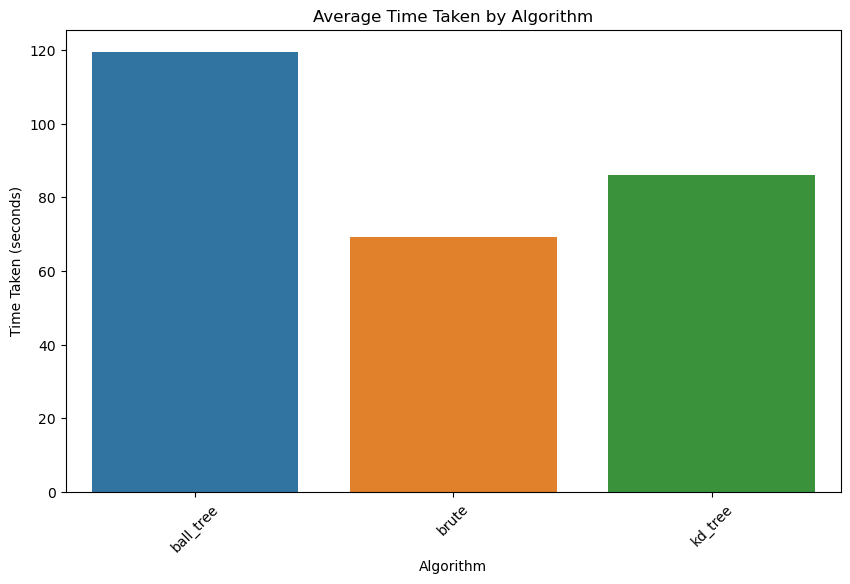

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('nn_results_with_mse_CMU.csv')

# Calculate average time taken for each algorithm
avg_time = data.groupby('Algorithm')['Time Taken'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Time Taken', data=avg_time)
plt.title('Average Time Taken by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Time Taken (seconds)')
plt.xticks(rotation=45)
plt.show()


# Visualization 2: Comparing Mean Squared Error (MSE) by Algorithms

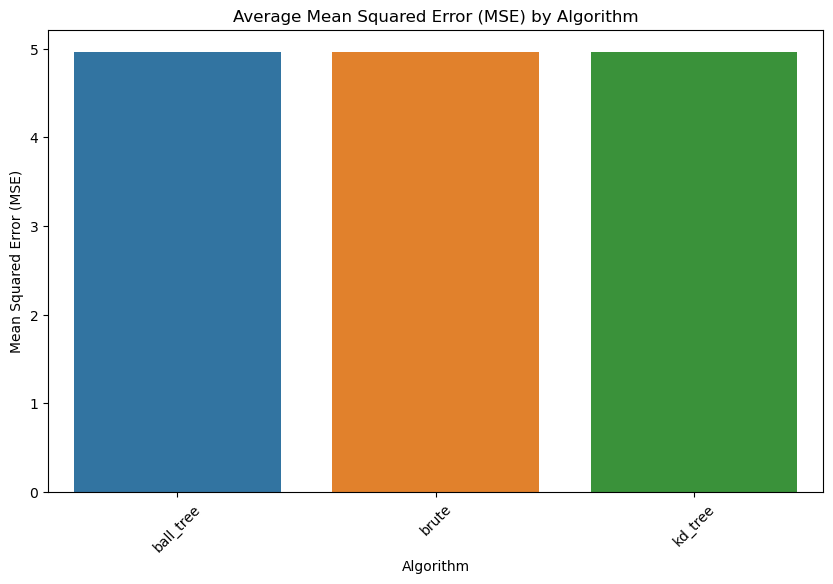

In [5]:
# Calculate average MSE for each algorithm
avg_mse = data.groupby('Algorithm')['Mean Squared Error (MSE)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Mean Squared Error (MSE)', data=avg_mse)
plt.title('Average Mean Squared Error (MSE) by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()


# Visualization 3: Heatmap of Time Taken by Algorithm and K


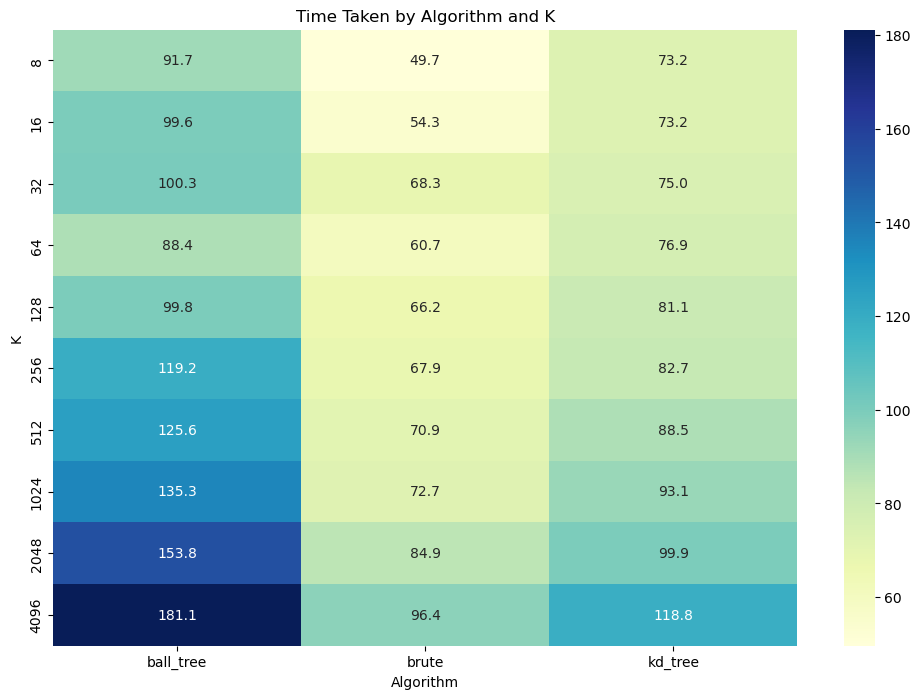

In [6]:
# Pivot table for heatmap
pivot_table_time = data.pivot_table(index='K', columns='Algorithm', values='Time Taken')

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_time, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Time Taken by Algorithm and K')
plt.xlabel('Algorithm')
plt.ylabel('K')
plt.show()

# Visualization 4: Heatmap of Mean Squared Error (MSE) by Algorithm and Distance Metric

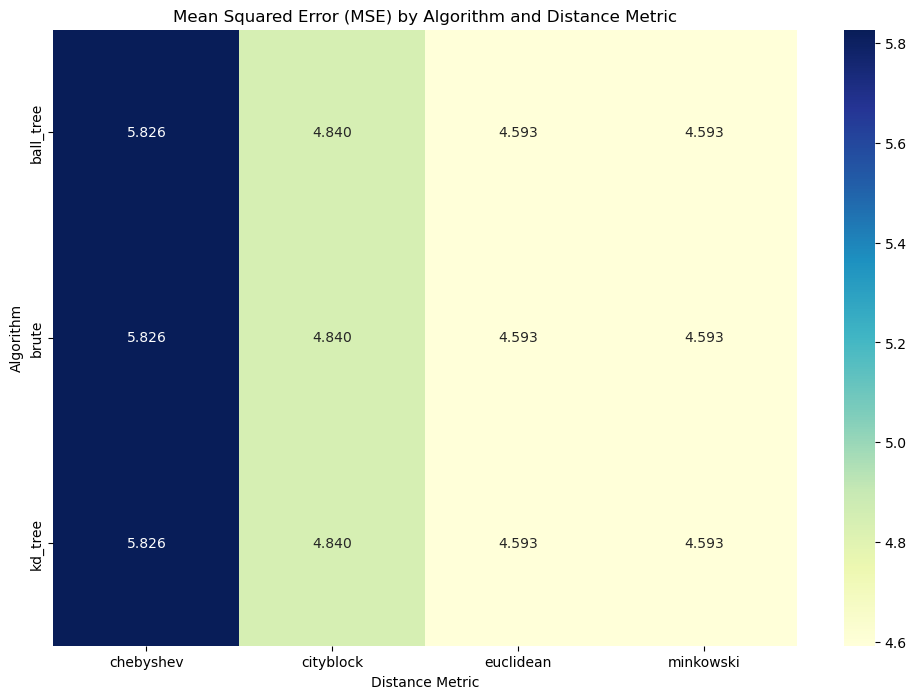

In [7]:
# Pivot table for heatmap
pivot_table_mse = data.pivot_table(index='Algorithm', columns='Distance Metric', values='Mean Squared Error (MSE)')

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_mse, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Mean Squared Error (MSE) by Algorithm and Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Algorithm')
plt.show()

# Heatmap that visualizes the relationship between time taken and distance metric across all values of K

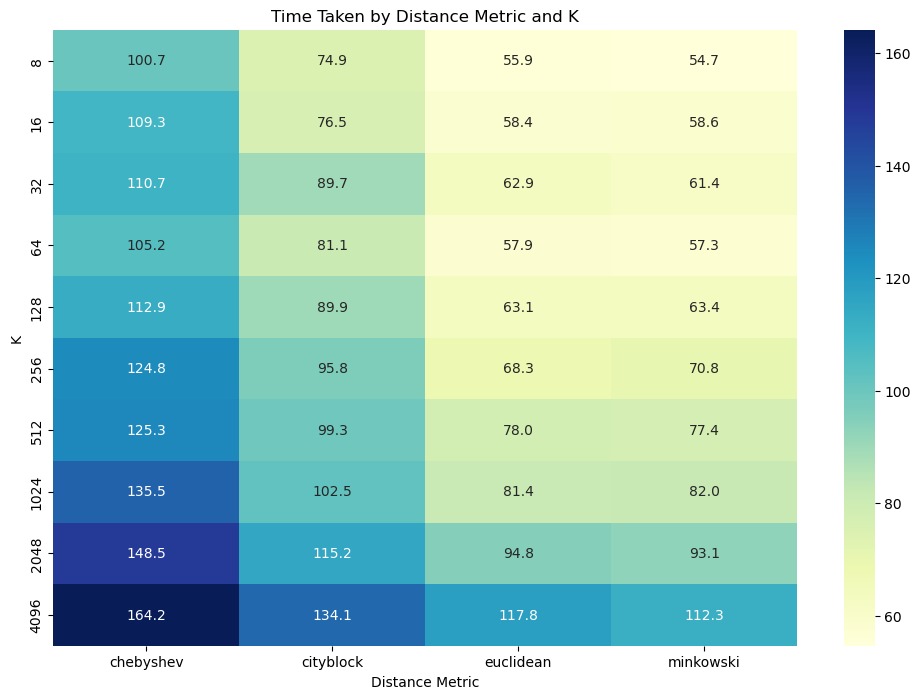

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('nn_results_with_mse_CMU.csv')

# Pivot table for heatmap of Time Taken by Distance Metric and K
pivot_table_time = data.pivot_table(index='K', columns='Distance Metric', values='Time Taken')

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_time, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Time Taken by Distance Metric and K')
plt.xlabel('Distance Metric')
plt.ylabel('K')
plt.show()
